<a href="https://colab.research.google.com/github/Sumin0411/SKTFlyAI/blob/main/02_KNN_Bin_Citrus(12_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-근접 이웃(이진분류)
* citrus 데이터셋

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv

--2023-12-26 07:55:38--  https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv.2’

citrus.csv.2        100%[===================>] 301.07K  --.-KB/s    in 0.03s   

2023-12-26 07:55:38 (9.51 MB/s) - ‘citrus.csv.2’ saved [308294/308294]



In [ ]:
citrus = pd.read_csv('citrus.csv')

In [ ]:
# 데이터의 shape
citrus.shape #샘플 수가 10000개 존재, 피쳐(변수)의 갯수가 6개

(10000, 6)

In [ ]:
df = citrus.copy()
df.head() # 상위 5개만 출력

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe() #각 column 중에 숫자로 된 column 출력

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [ ]:
#결측치(Missing Value)
df.isna().sum(axis=0) #비어있는지 아닌지를 알려줌

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
#타겟 값의 개수 확인
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

### 2. 테스트 분리

In [ ]:
# 8:2 분리
# data 섞기
df = df.sample(frac = 1)
df.head(10)

,name,diameter,weight,red,green,blue
5964,grapefruit,10.42,180.46,158,72,16
3552,orange,9.15,163.16,162,87,2
841,orange,7.27,134.80,158,86,3
1660,orange,7.94,144.65,163,91,7
1874,orange,8.09,146.91,156,74,2
270,orange,6.44,122.53,162,80,12
9175,grapefruit,12.69,216.03,156,93,17
1397,orange,7.77,141.73,157,83,2
2880,orange,8.73,156.28,163,80,2
9470,grapefruit,13.04,221.26,161,79,24


In [ ]:
#입력 타겟값 분리(입.출력 분리)
y = df['name']
y.head()

5964    grapefruit
3552        orange
841         orange
1660        orange
1874        orange
Name: name, dtype: object

In [ ]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
X = df[['diameter', 'weight', 'red', 'green', 'blue']]
X.head()

,diameter,weight,red,green,blue
5964,10.42,180.46,158,72,16
3552,9.15,163.16,162,87,2
841,7.27,134.80,158,86,3
1660,7.94,144.65,163,91,7
1874,8.09,146.91,156,74,2


In [ ]:
#확인
X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
# 테스트 데이터 분리(dataframe에 slicing 기능 이용)
idx = int(len(X) * 0.8)
idx

8000

In [ ]:
X_train = X.iloc[:idx]
X_test = X.iloc[idx:]

In [ ]:
X_train.shape, X_test.shape

((8000, 5), (2000, 5))

In [ ]:
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]

In [ ]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [ ]:
X_train.columns

Index(['diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
# #평균
# u_w = X_train['weight'].mean()
# std_w = X_train['weight'].std()

# X_train['weight'] =(X_train['weight'] - u_w)/std


# u_r = X_train['red'].mean()
# std_r = X_train['red'].std()

# X_train['red'] =(X_train['red'] - u_r)/std


# u_g = X_train['green'].mean()
# std_g = X_train['green'].std()

# X_train['green'] =(X_train['green'] - u_g)/std


# u_b = X_train['blue'].mean()
# std_b = X_train['blue'].std()

# X_train['blue'] =(X_train['blue'] - u_b)/std


u_d = X_train['diameter'].mean()
std_d = X_train['diameter'].std()
X_train['diameter'] = (X_train['diameter'] - u_d)/std_d


u_w = X_train['weight'].mean()
std_w = X_train['weight'].std()
X_train['weight'] = (X_train['weight'] - u_w)/std_w

u_r = X_train['red'].mean()
std_r = X_train['red'].std()
X_train['red'] = (X_train['red'] - u_r)/std_r

u_g = X_train['green'].mean()
std_g = X_train['green'].std()
X_train['green'] = (X_train['green'] - u_g)/std_g

u_b = X_train['blue'].mean()
std_b = X_train['blue'].std()
X_train['blue'] = (X_train['blue'] - u_b)/std_b

<ipython-input-179-f9ac9c36595a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['diameter'] = (X_train['diameter'] - u_d)/std_d
<ipython-input-179-f9ac9c36595a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['weight'] = (X_train['weight'] - u_w)/std_w
<ipython-input-179-f9ac9c36595a>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

### encoding

In [ ]:
y_train = y_train.map({'grapefruit' : 0, 'orange' : 1})
y_train

5964    0
3552    1
841     1
1660    1
1874    1
       ..
3613    1
2081    1
9245    0
7518    0
7959    0
Name: name, Length: 8000, dtype: int64

In [ ]:
X_train.head()

,diameter,weight,red,green,blue
5964,0.221561,0.178789,0.402877,-0.343351,0.509843
3552,-0.428871,-0.412005,0.787888,0.934116,-1.039033
841,-1.391717,-1.380498,0.402877,0.848952,-0.928399
1660,-1.048575,-1.044121,0.884140,1.274774,-0.485863
1874,-0.971752,-0.966942,0.210372,-0.173022,-1.039033


###KNN

In [ ]:
X_train = X_train.values
y_train = y_train.values
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
#알고리즘
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

### 5. 평가

In [ ]:
X_test['diameter']=(X_test['diameter']-u_d)/std_d
X_test['weight']=(X_test['weight']-u_w)/std_w
X_test['red']=(X_test['red']-u_r)/std_r
X_test['green']=(X_test['green']-u_g)/std_g
X_test['blue']=(X_test['blue']-u_b)/std_b

X_test.head()

<ipython-input-184-0f79a8622468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['diameter']=(X_test['diameter']-u_d)/std_d
<ipython-input-184-0f79a8622468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['weight']=(X_test['weight']-u_w)/std_w
<ipython-input-184-0f79a8622468>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,diameter,weight,red,green,blue
2529,-0.761770,-0.761701,-1.233417,1.189610,1.616182
5608,0.021822,-0.018598,1.557909,-0.343351,-0.485863
2630,-0.731041,-0.735405,-0.848407,0.848952,-1.039033
2374,-0.812985,-0.808145,0.306625,1.615432,-1.039033
9062,1.327809,1.334424,-0.848407,-0.684009,0.177941


In [ ]:
y_test=y_test.map({'grapefruit':0, 'orange':1})
y_test.head()

2529    1
5608    0
2630    1
2374    1
9062    0
Name: name, dtype: int64

In [ ]:
y_test=y_test.values
X_test=X_test.values
# 습관을 들여놔라 이케하는 (그럼 type에러는 안난다)

In [ ]:
# 학습된 clf에 X_test 데이터를 넣어 예측한 값을 y_pred에 저장
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# 예측한 값과 정답값과 비교
print(y_pred[:20])
print(y_test[:20])

[1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1]
[1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1]


In [ ]:
np.sum(y_test==y_pred)/len(y_test)

0.9195

In [ ]:
#오차 행렬
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf

array([[907,  86],
       [ 75, 932]])

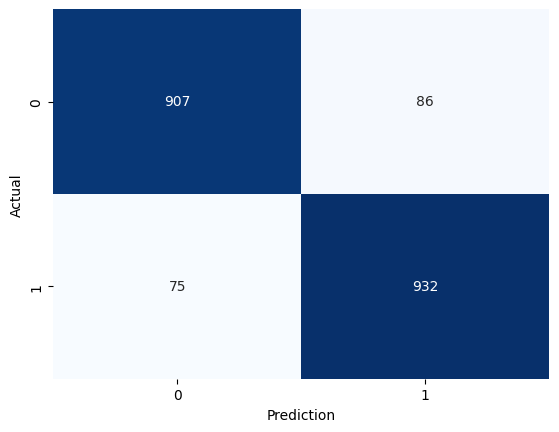

In [ ]:
s = sns.heatmap(cf, annot=True, cmap='Blues', fmt = 'd', cbar=False)
s.set(xlabel = 'Prediction', ylabel='Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy : {acc}')
print(f'recall : {re}')
print(f'precision : {ps}')
print(f'f1 : {f1}')

accuracy : 0.9195
recall : 0.9255213505461768
precision : 0.9155206286836935
f1 : 0.920493827160494


### 6. 모델 튜닝

In [ ]:
score = []
for k in range(3, 100):
  clf = KNeighborsClassifier(n_neighbors=k) #k값을 넣으면서 학습시키며 정확도를 구함
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  score.append(acc)

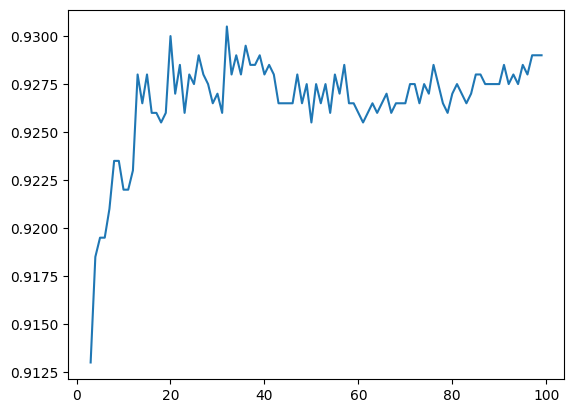

In [ ]:
plt.plot(range(3,100), score)
plt.show()

In [ ]:
#k가 40일때가 베스트라고하면

best_clf = KNeighborsClassifier(n_neighbors=40)
best_clf = clf.fit(X_train, y_train)